**Лабораторна робота 3(1.1)**

**студента групи ФІТ 4-4**

**Сакуна Владислава Олександровича**

Тема: Побудова автокодувальника

**Завдання 1.** Розробити звичайний автокодувальник  для датасету рукописних цифр MNIST на основі багатошарової нейронної мережі.  

11490434/11490434 [==============================] - 0s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 32)                4128      
                                                                 
 dense_2 (Dense)             (None, 128)               4224      
                                                                 
 dense_3 (Dense)             (None, 784)               101136    
                                                                 
Total params: 209968 (820.19 KB)
Trainable params: 209968 (820.19 KB)
Non-trainable params: 0 (0.00 Byte)
______________________

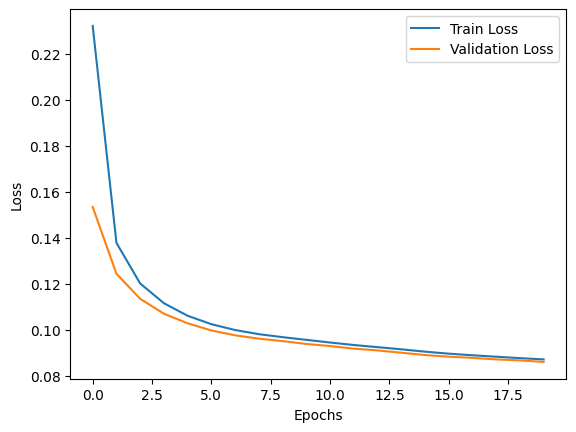

313/313 [==============================] - 1s 2ms/step


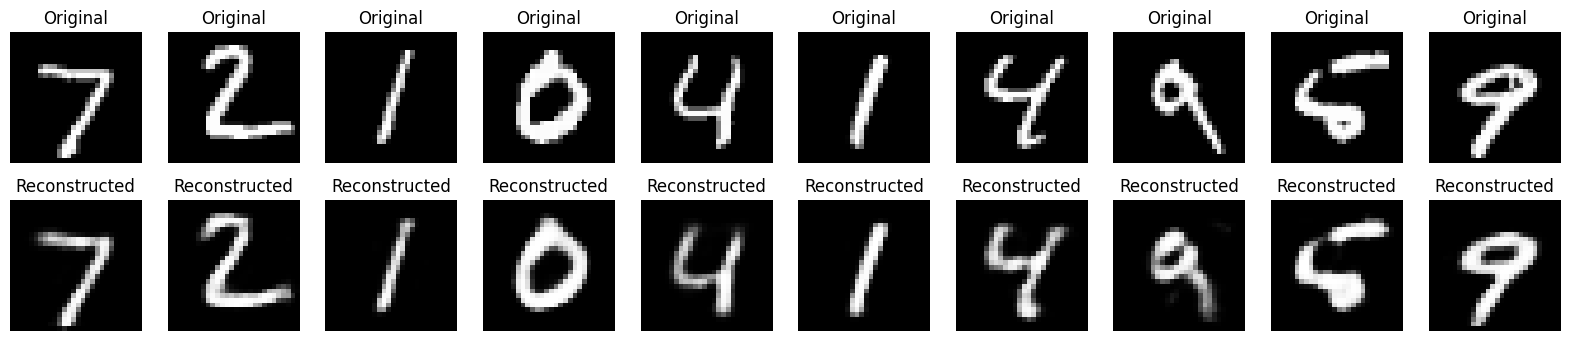

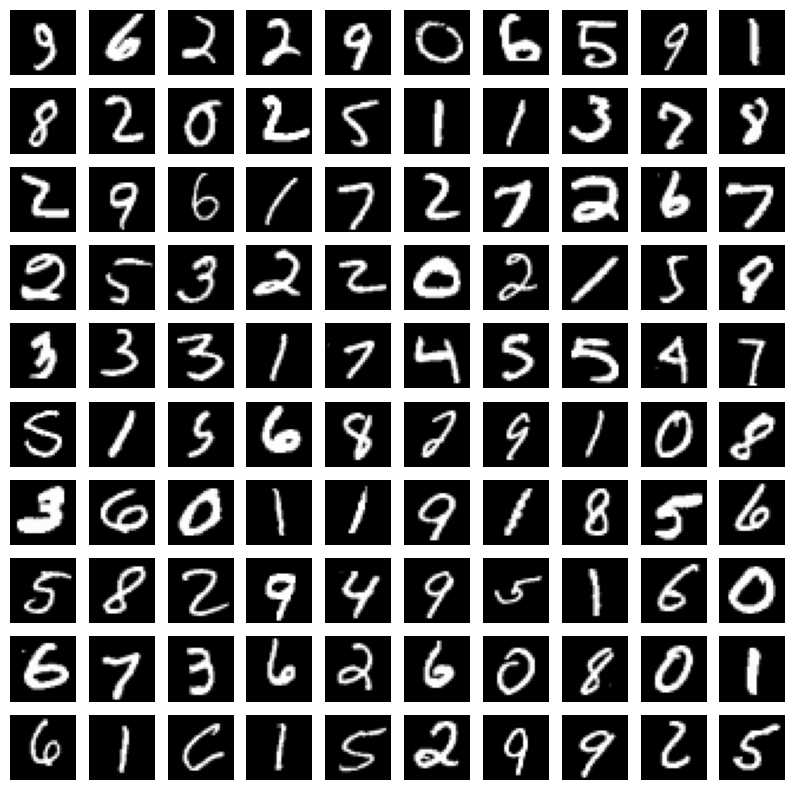

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

mnist = tf.keras.datasets.mnist
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train / 255.0
x_test = x_test / 255.0

x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

def build_autoencoder(input_dim, encoding_dim):
    input_img = tf.keras.layers.Input(shape=(input_dim,))

    encoded = tf.keras.layers.Dense(128, activation='relu')(input_img)
    encoded = tf.keras.layers.Dense(encoding_dim, activation='relu')(encoded)

    decoded = tf.keras.layers.Dense(128, activation='relu')(encoded)
    decoded = tf.keras.layers.Dense(input_dim, activation='sigmoid')(decoded)

    autoencoder = tf.keras.models.Model(input_img, decoded)

    return autoencoder

input_dim = x_train.shape[1]
encoding_dim = 32

autoencoder = build_autoencoder(input_dim, encoding_dim)
autoencoder.summary()

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

history = autoencoder.fit(x_train, x_train,
                          epochs=20,
                          batch_size=256,
                          shuffle=True,
                          validation_data=(x_test, x_test))

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):

    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title('Original')
    plt.axis('off')

    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    plt.title('Reconstructed')
    plt.axis('off')
plt.show()


(x_train, _), (_, _) = mnist.load_data()

indices = np.random.randint(0, x_train.shape[0], 100)
images = x_train[indices]

plt.figure(figsize=(10, 10))
for i in range(len(indices)):
    plt.subplot(10, 10, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.axis('off')
plt.show()

Висновок. У рамках першого завдання я розробив автокодувальник для аналізу датасету рукописних цифр MNIST за допомогою багатошарової нейронної мережі, яка включала вхідний шар, два приховані шари (енкодер і декодер) та вихідний шар.

Після завершення навчання моделі я побудував графік функції втрат для тренувального та валідаційного наборів даних. Аналіз цього графіка показав систематичне зменшення функції втрат з кожною епохою, що свідчить про успішність навчання моделі.